In [1]:
# Arquivo integrante do projeto para identificação dos preditores mais correlacionados 
# aos óbitos por COVID no Brasil, apresentado à PUC-MINAS como TCC

# Modelos com feature selection e hiperparametros ajustados


In [2]:
# Carrega as funções comuns
%run ./funcoes.ipynb

In [3]:
# Carrega a base tratada mas não balanceada, usada para a definição das variáveis de cada modelo
arquivo_base = "INFLUD21-29-03-2021.csv"  
ext_file = "_processed_pre_dummies.csv"
rad_filename = arquivo_base[:-4]  #exclui a extensão do arquivo
filename_pre_des = rad_filename + ext_file
covid_df_pre_dummies = load_df(filename_pre_des,";",None,None) #carrega os dados do arquivo csv parcialmente preprocessado
print('Núm. linhas e colunas:',covid_df_pre_dummies.shape) #exibe a quantidade de linhas e colunas do dataframe

Núm. linhas e colunas: (254948, 43)


In [4]:
# Excluir variável redundante
covid_df_pre_dummies = covid_df_pre_dummies.drop(['NU_IDADE_CAT'], axis = 1)

In [5]:
covid_df_pre_dummies

,HOSPITAL,UTI,SUPORT_VEN,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,PERD_PALA,TOMO_RES,AN_SARS2,CS_SEXO,POS_AN_OUT,NU_IDADE_N,RES_IGM,RES_IGA,GeoSES,OBT_COVID
0,1.0,2.0,2.0,1,1.0,1.0,2.0,2.0,1.0,1.0,...,2.0,6.0,9.0,0,9.0,84.0,9.0,9.0,0.338935,0
1,1.0,2.0,2.0,4,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,5.0,9.0,1,9.0,71.0,9.0,9.0,0.338935,0
2,1.0,1.0,2.0,1,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,9.0,1,9.0,87.0,9.0,9.0,0.338935,0
3,1.0,9.0,9.0,9,1.0,2.0,2.0,1.0,2.0,2.0,...,2.0,9.0,9.0,1,9.0,78.0,9.0,9.0,0.338935,1
4,1.0,2.0,3.0,1,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,9.0,1,9.0,86.0,9.0,9.0,0.338935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254943,1.0,2.0,1.0,1,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,6.0,9.0,0,9.0,73.0,9.0,9.0,-0.289366,0
254944,1.0,2.0,2.0,4,1.0,1.0,1.0,1.0,1.0,1.0,...,9.0,9.0,9.0,0,9.0,87.0,9.0,9.0,-0.599925,1
254945,2.0,9.0,3.0,1,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,6.0,9.0,1,9.0,63.0,9.0,9.0,-0.053457,1
254946,1.0,9.0,9.0,2,1.0,1.0,9.0,1.0,1.0,2.0,...,9.0,9.0,9.0,1,9.0,86.0,9.0,9.0,-0.721754,0


In [6]:
# Variavel para armazenas o relatórios de desempenho
report={}
# Lista com a variavel alvo
col_target = ['OBT_COVID']

# Logistic Regression

In [7]:
# Indices das variáveis selecionadas para LogisticRegression. Vieram do arquivo COVID_Selecao_de_atributos.ipynb
indice_lr_30 = [1, 1, 1, 1, 4, 1, 7, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

i = 0
features_lr=[]
while i < len(indice_lr_30):
    if (indice_lr_30[i]==1):
        features_lr.append(covid_df_pre_dummies.columns[i])
    i=i+1
features_lr

['HOSPITAL',
 'UTI',
 'SUPORT_VEN',
 'CS_RACA',
 'TOSSE',
 'DISPNEIA',
 'DESC_RESP',
 'SATURACAO',
 'DIARREIA',
 'OUTRO_SIN',
 'PUERPERA',
 'HEMATOLOGI',
 'SIND_DOWN',
 'ASMA',
 'DIABETES',
 'NEUROLOGIC',
 'PNEUMOPATI',
 'IMUNODEPRE',
 'RENAL',
 'OBESIDADE',
 'OUT_MORBI',
 'VACINA',
 'CLASSI_FIN',
 'PCR_SARS2',
 'FADIGA',
 'PERD_OLFT',
 'PERD_PALA',
 'TOMO_RES',
 'AN_SARS2',
 'CS_SEXO',
 'POS_AN_OUT',
 'NU_IDADE_N',
 'RES_IGM',
 'RES_IGA',
 'GeoSES']

In [8]:
# Seleciona apednas as 31 variáveis selecionadas para o modelo
sel_col_lr = ['HOSPITAL', 'UTI', 'SUPORT_VEN', 'CS_RACA', 'TOSSE', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'OUTRO_SIN', 'PUERPERA', 'HEMATOLOGI', 'SIND_DOWN', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'VACINA', 'CLASSI_FIN', 'PCR_SARS2', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'TOMO_RES', 'AN_SARS2', 'CS_SEXO', 'POS_AN_OUT', 'NU_IDADE_N', 'RES_IGM', 'RES_IGA', 'GeoSES']

columns = sel_col_lr + col_target
covid_df_pre_dummies_lr = covid_df_pre_dummies[columns]

In [9]:
# Converte os tipos das variaveis do dataframe
covid_df_pre_dummies_lr_cat = converte_tipo_category(covid_df_pre_dummies_lr)

In [10]:
# Converte as variáveis categóricas em binárias (dummies)
covid_df_pre_dummies_lr_bin = converte_binarios(covid_df_pre_dummies_lr_cat) 

In [11]:
# Normalizada as colunas contínuas
covid_df_pre_dummies_lr_nor = normaliza_dados(covid_df_pre_dummies_lr_bin)

Arquivo informado: INFLUD21-29-03-2021_processed_pre_dummies.csv
Verifica existencia do arquivo: True
Arquivo INFLUD21-29-03-2021_processed_pre_dummies_117_proc_smote_over.csv foi encontrado.
Carregando o arquivo...
Concluído.


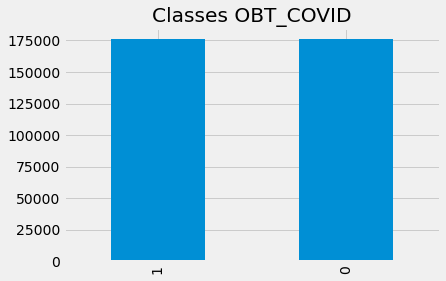

In [12]:
# Balanceamento da base de desenvolvimento Com SMOTE oversampling
covid_df_pre_dummies_lr_bal = imblearn_SMOTE_oversampling(covid_df_pre_dummies_lr_nor,filename_pre_des,False,'OBT_COVID')

In [13]:
# Criação dos datasets de treino e teste
train, test = train_test_split(covid_df_pre_dummies_lr_bal, test_size=0.25, random_state=42)

In [14]:
# Separa as variaveis do dataset de treino em independentes e dependente (alvo)
labels = train.columns[:-1]  #última coluna comtém o atributo dependente (OBT_COVID)
X_train = train[labels] #dataframe com todas as colunas exceto a variável alvo
y_train = train['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.
x_test = test[labels]
y_test = test['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.

In [15]:
covid_df_pre_dummies_lr_bal

,NU_IDADE_N,GeoSES,AN_SARS2_1.0,AN_SARS2_9.0,ASMA_1.0,ASMA_2.0,ASMA_9.0,CARDIOPATI_1.0,CARDIOPATI_2.0,CARDIOPATI_9.0,...,TOSSE_1.0,TOSSE_2.0,TOSSE_9.0,UTI_1.0,UTI_2.0,UTI_9.0,VACINA_1.0,VACINA_2.0,VACINA_9.0,OBT_COVID
0,0.646154,0.662604,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,0.546154,0.662604,0,1,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,0.669231,0.662604,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
3,0.600000,0.662604,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
4,0.661538,0.662604,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351835,0.688206,0.674976,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
351836,0.466494,0.481421,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,1
351837,0.491169,0.546128,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
351838,0.561398,0.482540,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1


Selecionado modelo LogisticRegression Ajustado.
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     43926
           1       0.90      0.84      0.87     44034

    accuracy                           0.87     87960
   macro avg       0.87      0.87      0.87     87960
weighted avg       0.87      0.87      0.87     87960



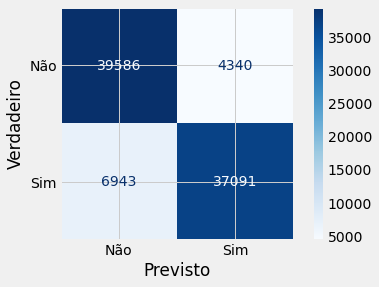

In [16]:
# Cria modelo LogisticRegfression com os hiperparâmetros padrão através da função/notebook e 30 variáveis selecionadas(RFE)
modelo_LogisticReg = cria_modelo(X_train,y_train,"2",True)
# Avalia o modelo
report = avalia_modelo(x_test,y_test,modelo_LogisticReg,report, "smote_30_feat")

#  XGBoost/XGBClassifier

In [17]:
# Índices das variáveis selecionadas para XGBClassifier. Vieram do arquivo COVID_Selecao_de_atributos.ipynb
indice_XGB = [1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 7, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
i = 0
features_XGB=[]
while i < len(indice_XGB):
    if (indice_XGB[i]==1):
        features_XGB.append(covid_df_pre_dummies.columns[i])
    i=i+1
features_XGB

['HOSPITAL',
 'UTI',
 'SUPORT_VEN',
 'CS_RACA',
 'FEBRE',
 'TOSSE',
 'DISPNEIA',
 'DESC_RESP',
 'SATURACAO',
 'DIARREIA',
 'OUTRO_SIN',
 'CARDIOPATI',
 'SIND_DOWN',
 'HEPATICA',
 'ASMA',
 'DIABETES',
 'NEUROLOGIC',
 'PNEUMOPATI',
 'IMUNODEPRE',
 'RENAL',
 'OBESIDADE',
 'OUT_MORBI',
 'VACINA',
 'CLASSI_FIN',
 'PCR_SARS2',
 'PERD_OLFT',
 'PERD_PALA',
 'TOMO_RES',
 'AN_SARS2',
 'CS_SEXO',
 'POS_AN_OUT',
 'NU_IDADE_N',
 'RES_IGM',
 'RES_IGA',
 'GeoSES']

In [18]:
# Seleciona apednas as variáveis necessárias ao modelo
sel_col_xgb = ['HOSPITAL', 'UTI', 'SUPORT_VEN', 'CS_RACA', 'FEBRE', 'TOSSE', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'OUTRO_SIN', 'CARDIOPATI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'VACINA', 'CLASSI_FIN', 'PCR_SARS2', 'PERD_OLFT', 'PERD_PALA', 'TOMO_RES', 'AN_SARS2', 'CS_SEXO', 'POS_AN_OUT', 'NU_IDADE_N', 'RES_IGM', 'RES_IGA', 'GeoSES']

columns_xgb = sel_col_xgb + col_target
covid_df_pre_dummies_xgb = covid_df_pre_dummies[columns_xgb]

Arquivo informado: INFLUD21-29-03-2021_processed_pre_dummies.csv
Verifica existencia do arquivo: True
Arquivo INFLUD21-29-03-2021_processed_pre_dummies_117_proc_smote_over.csv foi encontrado.
Carregando o arquivo...
Concluído.


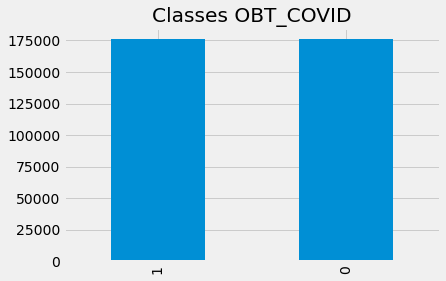

In [19]:
# Converte os tipos das variaveis do dataframe
covid_df_pre_dummies_xgb_cat = converte_tipo_category(covid_df_pre_dummies_xgb)
# Converte as variáveis categóricas em binárias (dummies)
covid_df_pre_dummies_xgb_bin = converte_binarios(covid_df_pre_dummies_xgb_cat) 
# Normalizada as colunas contínuas
covid_df_pre_dummies_xgb_nor = normaliza_dados(covid_df_pre_dummies_xgb_bin)
# Balanceamento da base de desenvolvimento Com SMOTE oversampling
covid_df_pre_dummies_xgb_bal = imblearn_SMOTE_oversampling(covid_df_pre_dummies_xgb_nor,filename_pre_des,False,'OBT_COVID')

In [20]:
# Criação dos datasets de treino e teste
train_xgb, test_xgb = train_test_split(covid_df_pre_dummies_xgb_bal, test_size=0.25, random_state=42)
#Separa as variaveis do dataset de treino em independentes e dependente (alvo)
labels = train_xgb.columns[:-1]  #última coluna comtém o atributo dependente (OBT_COVID)
X_train_xgb = train_xgb[labels] #dataframe com todas as colunas exceto a variável alvo
y_train_xgb = train_xgb['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.
x_test_xgb = test_xgb[labels]
y_test_xgb = test_xgb['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.

Selecionado modelo XGBClassifier Ajustado.
C:\Users\02373373718\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:01:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     43926
           1       0.89      0.87      0.88     44034

    accuracy                           0.88     87960
   macro avg       0.88     

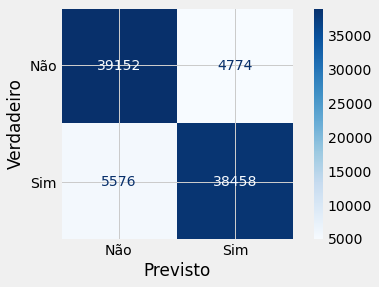

In [21]:
# Cria modelo XGBClassifier com os parametros ajustados através da função/notebook e 32 variáveis selecionadas(RFE)
modelo_XGBClassifier = cria_modelo(X_train_xgb,y_train_xgb,"1", True)
report = avalia_modelo(x_test_xgb,y_test_xgb,modelo_XGBClassifier,report, "XGB_35_feat")

#  DecisionTree

In [22]:
# Índices das variáveis selecionadas para DecisionTree. Vieram do arquivo COVID_Selecao_de_atributos.ipynb
indiceDT4 = [28, 10,  1,  2,  4,  9, 14, 19, 20, 18, 15, 23,  6, 29,  5, 37, 38, 36, 34, 11, 25, 32, 33, 30,  21, 12,  7,  1, 16, 27,  3, 26, 22,  8, 35, 13, 24,  1, 17, 31,  1]
i = 0
features_DT=[]
while i < len(indiceDT4):
    if (indiceDT4[i]==1):
        features_DT.append(covid_df_pre_dummies.columns[i])
    i=i+1
features_DT

['SUPORT_VEN', 'CLASSI_FIN', 'NU_IDADE_N', 'GeoSES']

In [23]:
# Seleciona apenas as variáveis necessárias ao modelo usando o RFE
sel_col_DT = ['SUPORT_VEN', 'CLASSI_FIN', 'NU_IDADE_N', 'GeoSES']
columns_DT = sel_col_DT + col_target
covid_df_pre_dummies_DT = covid_df_pre_dummies[columns_DT]

Arquivo informado: INFLUD21-29-03-2021_processed_pre_dummies.csv
Verifica existencia do arquivo: True
Arquivo INFLUD21-29-03-2021_processed_pre_dummies_13_proc_smote_over.csv foi encontrado.
Carregando o arquivo...
Concluído.


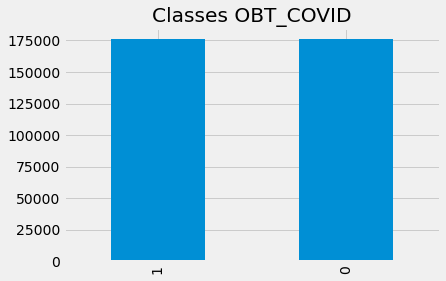

In [24]:
#Converte os tipos das variaveis do dataframe
covid_df_pre_dummies_DT_cat = converte_tipo_category(covid_df_pre_dummies_DT)
#Converte as variáveis categóricas em binárias (dummies)
covid_df_pre_dummies_DT_bin = converte_binarios(covid_df_pre_dummies_DT_cat) 
#Normalizada as colunas contínuas
covid_df_pre_dummies_DT_nor = normaliza_dados(covid_df_pre_dummies_DT_bin)
# Balanceamento da base de desenvolvimento Com SMOTE oversampling
covid_df_pre_dummies_DT_bal = imblearn_SMOTE_oversampling(covid_df_pre_dummies_DT_nor,filename_pre_des,False,'OBT_COVID')

In [25]:
# Criação dos datasets de treino e teste
train_dt, test_dt = train_test_split(covid_df_pre_dummies_DT_bal, test_size=0.25, random_state=42)
# Separa as variaveis do dataset de treino em independentes e dependente (alvo)
labels = train_dt.columns[:-1]  #última coluna comtém o atributo dependente (OBT_COVID)
X_train_dt = train_dt[labels] #dataframe com todas as colunas exceto a variável alvo
y_train_dt = train_dt['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.
x_test_dt = test_dt[labels]
y_test_dt = test_dt['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.

Selecionado modelo DecisionTreeClassifier ajustado.
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     43926
           1       0.80      0.81      0.80     44034

    accuracy                           0.80     87960
   macro avg       0.80      0.80      0.80     87960
weighted avg       0.80      0.80      0.80     87960



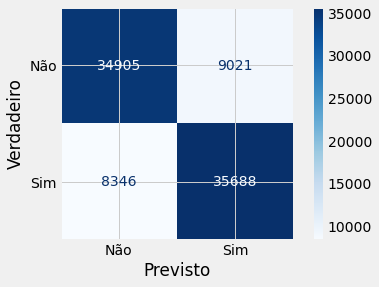

In [26]:
# Cria modelo Decision Tree com os parametros ajustados através da função/notebook e 4 variáveis selecionadas
# Treino com dados desbalanceados 
modelo_DecisionTree = cria_modelo(X_train_dt,y_train_dt,"5",True)
## avalia o modelo DecisionTree
report = avalia_modelo(x_test_dt,y_test_dt,modelo_DecisionTree,report,"_DTree_4_feat")

# ExtraTreesClassifier

In [27]:
# Índice das variáveis selecionadas. Vem de COVID_Selecao_de_atributos.ipynb.
indiceXTC = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 2, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
i = 0
features_XTC=[]
while i < len(indiceXTC):
    if (indiceXTC[i]==1):
        features_XTC.append(covid_df_pre_dummies.columns[i])
    i=i+1
features_XTC

['HOSPITAL',
 'UTI',
 'SUPORT_VEN',
 'CS_RACA',
 'FEBRE',
 'TOSSE',
 'GARGANTA',
 'DISPNEIA',
 'DESC_RESP',
 'SATURACAO',
 'DIARREIA',
 'VOMITO',
 'OUTRO_SIN',
 'PUERPERA',
 'CARDIOPATI',
 'ASMA',
 'DIABETES',
 'NEUROLOGIC',
 'PNEUMOPATI',
 'IMUNODEPRE',
 'RENAL',
 'OBESIDADE',
 'OUT_MORBI',
 'VACINA',
 'CLASSI_FIN',
 'PCR_SARS2',
 'DOR_ABD',
 'FADIGA',
 'PERD_OLFT',
 'PERD_PALA',
 'TOMO_RES',
 'AN_SARS2',
 'CS_SEXO',
 'POS_AN_OUT',
 'NU_IDADE_N',
 'RES_IGM',
 'RES_IGA',
 'GeoSES']

In [28]:
# Seleciona apenas as variáveis necessárias ao modelo usando o RFE
sel_col_ETC=['HOSPITAL', 'UTI', 'SUPORT_VEN', 'CS_RACA', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA', 'CARDIOPATI', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'OUT_MORBI', 'VACINA', 'CLASSI_FIN', 'PCR_SARS2', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'TOMO_RES', 'AN_SARS2', 'CS_SEXO', 'POS_AN_OUT', 'NU_IDADE_N', 'RES_IGM', 'RES_IGA', 'GeoSES']
columns_ETC = sel_col_ETC + col_target
covid_df_pre_dummies_ETC = covid_df_pre_dummies[columns_ETC]

In [29]:
covid_df_pre_dummies_ETC

,HOSPITAL,UTI,SUPORT_VEN,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,PERD_PALA,TOMO_RES,AN_SARS2,CS_SEXO,POS_AN_OUT,NU_IDADE_N,RES_IGM,RES_IGA,GeoSES,OBT_COVID
0,1.0,2.0,2.0,1,1.0,1.0,2.0,2.0,1.0,1.0,...,2.0,6.0,9.0,0,9.0,84.0,9.0,9.0,0.338935,0
1,1.0,2.0,2.0,4,1.0,1.0,2.0,1.0,2.0,1.0,...,2.0,5.0,9.0,1,9.0,71.0,9.0,9.0,0.338935,0
2,1.0,1.0,2.0,1,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,9.0,1,9.0,87.0,9.0,9.0,0.338935,0
3,1.0,9.0,9.0,9,1.0,2.0,2.0,1.0,2.0,2.0,...,2.0,9.0,9.0,1,9.0,78.0,9.0,9.0,0.338935,1
4,1.0,2.0,3.0,1,2.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,9.0,1,9.0,86.0,9.0,9.0,0.338935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254943,1.0,2.0,1.0,1,2.0,2.0,1.0,1.0,1.0,1.0,...,2.0,6.0,9.0,0,9.0,73.0,9.0,9.0,-0.289366,0
254944,1.0,2.0,2.0,4,1.0,1.0,1.0,1.0,1.0,1.0,...,9.0,9.0,9.0,0,9.0,87.0,9.0,9.0,-0.599925,1
254945,2.0,9.0,3.0,1,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,6.0,9.0,1,9.0,63.0,9.0,9.0,-0.053457,1
254946,1.0,9.0,9.0,2,1.0,1.0,9.0,1.0,1.0,2.0,...,9.0,9.0,9.0,1,9.0,86.0,9.0,9.0,-0.721754,0


Arquivo informado: INFLUD21-29-03-2021_processed_pre_dummies.csv
Verifica existencia do arquivo: True
Arquivo INFLUD21-29-03-2021_processed_pre_dummies_126_proc_smote_over.csv foi encontrado.
Carregando o arquivo...
Concluído.


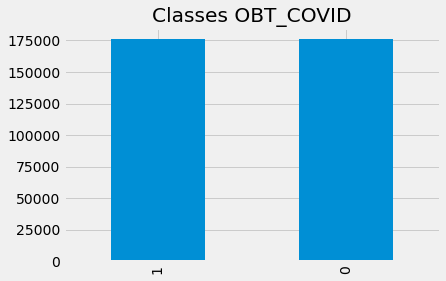

In [30]:
# Converte os tipos das variaveis do dataframe
covid_df_pre_dummies_ETC_cat = converte_tipo_category(covid_df_pre_dummies_ETC)
# Converte as variáveis categóricas em binárias (dummies)
covid_df_pre_dummies_ETC_bin = converte_binarios(covid_df_pre_dummies_ETC_cat) 
# Normalizada as colunas contínuas
covid_df_pre_dummies_ETC_nor = normaliza_dados(covid_df_pre_dummies_ETC_bin)
# Balanceamento da base de desenvolvimento Com SMOTE oversampling
covid_df_pre_dummies_ETC_bal = imblearn_SMOTE_oversampling(covid_df_pre_dummies_ETC_nor,filename_pre_des,False,'OBT_COVID')

In [31]:
# Criação dos datasets de treino e teste
train_etc, test_etc = train_test_split(covid_df_pre_dummies_ETC_bal, test_size=0.25, random_state=42)
# Separa as variaveis do dataset de treino em independentes e dependente (alvo)
labels = train_etc.columns[:-1]  #última coluna comtém o atributo dependente (OBT_COVID)
X_train_etc = train_etc[labels] #dataframe com todas as colunas exceto a variável alvo
y_train_etc = train_etc['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.
x_test_etc = test_etc[labels]
y_test_etc = test_etc['OBT_COVID'].astype('category') #ndarray com a variável a ser classificada.

Selecionado modelo ExtraTreesClassifier ajustado.
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     43926
           1       0.88      0.88      0.88     44034

    accuracy                           0.88     87960
   macro avg       0.88      0.88      0.88     87960
weighted avg       0.88      0.88      0.88     87960



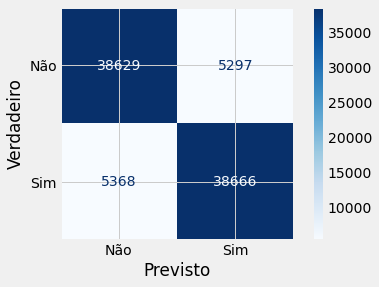

In [32]:
# Cria modelo ExtraTreesClassifier com 35 features selecionadas 
# Treino com dados balanceados 
modelo_ExtraTree = cria_modelo(X_train_etc,y_train_etc,"7",True)
## avalia o modelo ExtraTreesClassifier
report = avalia_modelo(x_test_etc,y_test_etc,modelo_ExtraTree,report,"_ExtraTree_35_feat")

In [33]:
# Exibe todos os resultados
for modelos,score in report.items():
    print(modelos)
    print(score)

LogisticRegressionsmote_30_feat
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     43926
           1       0.90      0.84      0.87     44034

    accuracy                           0.87     87960
   macro avg       0.87      0.87      0.87     87960
weighted avg       0.87      0.87      0.87     87960

XGBClassifierXGB_35_feat
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     43926
           1       0.89      0.87      0.88     44034

    accuracy                           0.88     87960
   macro avg       0.88      0.88      0.88     87960
weighted avg       0.88      0.88      0.88     87960

DecisionTreeClassifier_DTree_4_feat
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     43926
           1       0.80      0.81      0.80     44034

    accuracy                           0.80     87960
   macro avg       0.80      0.80  